In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Task 1

In [23]:
def gaussian(x, mu, sig):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )

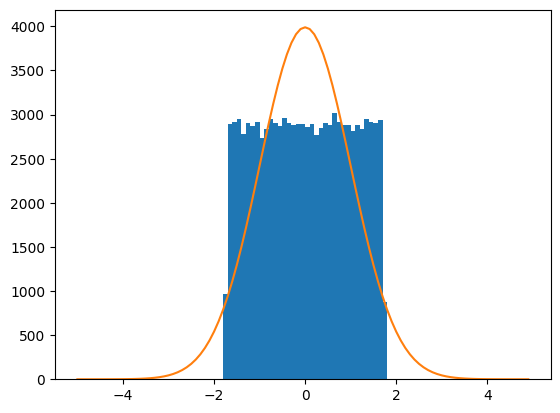

In [28]:
# uniform distribution with unit variance
x1 = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=100000)
plt.hist(x1, np.arange(-5, 5, .1))
x = np.arange(-5, 5, .1)
plt.plot(x, gaussian(x, 0, 1)*10000)

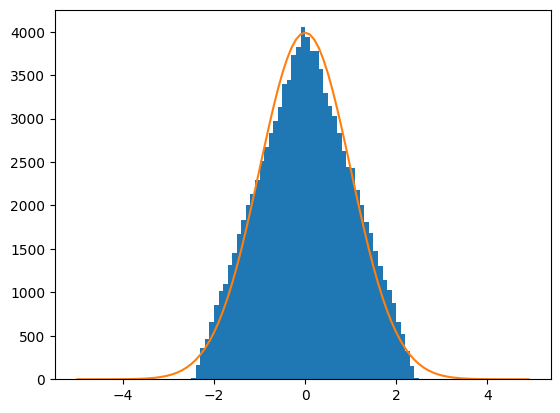

In [29]:
x1 = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=100000)
x2 = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=100000)
plt.hist((x1+x2)/np.sqrt(2), np.arange(-5, 5, .1))
x = np.arange(-5, 5, .1)
plt.plot(x, gaussian(x, 0, 1)*10000)

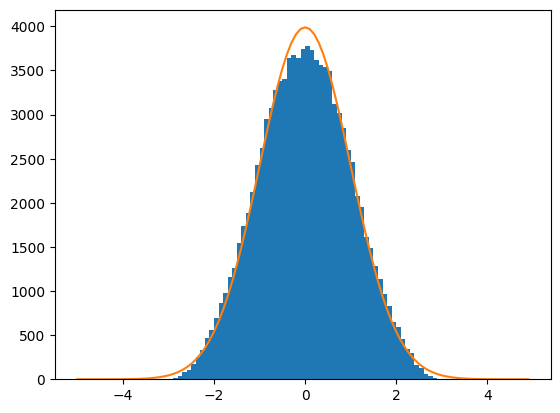

In [30]:
x1 = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=100000)
x2 = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=100000)
x3 = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=100000)
plt.hist((x1+x2+x3)/np.sqrt(3), np.arange(-5, 5, .1))
x = np.arange(-5, 5, .1)
plt.plot(x, gaussian(x, 0, 1)*10000)

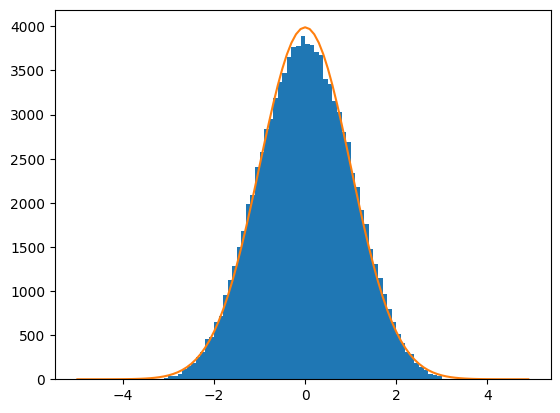

In [32]:
x1 = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=100000)
x2 = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=100000)
x3 = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=100000)
x4 = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=100000)
plt.hist((x1+x2+x3+x4)/np.sqrt(4), np.arange(-5, 5, .1))
x = np.arange(-5, 5, .1)
plt.plot(x, gaussian(x, 0, 1)*10000)

# Task 2

In [88]:
samples = []

for i in range(100):
    samples.append(np.random.normal(loc=2, scale=3, size=5))


In [89]:
import scipy.stats as st
# The function ppf from the scipy.stats.norm package can be used to determine the rejection regions in units of standard deviations
# It however calculates normally one-sided rejection regions, so we need to transform our p-values
p = 0.685
mu = 3
sigma = 2
left_boundary_sigma = st.norm.ppf((1-p)/2)
right_boundary_sigma = st.norm.ppf(1-(1-p)/2)
print(left_boundary_sigma, right_boundary_sigma)
# for sigma we take the standard deviation of the sample mean
left_boundary = mu + sigma/np.sqrt(5)*left_boundary_sigma
right_boundary = mu + sigma/np.sqrt(5)*right_boundary_sigma
print(left_boundary, right_boundary)
p = 0.95
left_boundary_sigma = st.norm.ppf((1-p)/2)
right_boundary_sigma = st.norm.ppf(1-(1-p)/2)
print(left_boundary_sigma, right_boundary_sigma)
left_boundary = mu + sigma/np.sqrt(5)*left_boundary_sigma
right_boundary = mu + sigma/np.sqrt(5)*right_boundary_sigma
print(left_boundary, right_boundary)

-1.0047858060707053 1.0047858060707053
2.101292253919593 3.898707746080407
-1.959963984540054 1.959963984540054
1.246954918846837 4.753045081153163


In [90]:
def check(sample, mu, sig, p):
    left_boundary = st.norm.ppf((1-p)/2)
    right_boundary = st.norm.ppf(1-(1-p)/2)
    return sample.mean()>mu+sig/np.sqrt(len(sample))*left_boundary and sample.mean()<mu+sig/np.sqrt(len(sample))*right_boundary

In [91]:
check(samples[8], 2, 3, .685)

True

In [105]:
pass_confidence_test = []
for sample in samples:
    pass_confidence_test.append(check(sample, 2, 3, .685))

In [122]:
np.array(pass_confidence_test).sum()/len(pass_confidence_test)

0.74

In [123]:
def make_confidence_intervals(sample, sig, p):
    left_boundary = st.norm.ppf((1-p)/2)
    right_boundary = st.norm.ppf(1-(1-p)/2)
    return sample.mean(), sample.mean()+sig/np.sqrt(len(sample))*left_boundary, sample.mean()+sig/np.sqrt(len(sample))*right_boundary

In [125]:
make_confidence_intervals(samples[0], 3, .685)

(3.6356412575574217, 2.287579638436811, 4.9837028766780325)

In [126]:
means = []
errors = []
for sample in samples:
    means.append(make_confidence_intervals(sample, 3, .685)[0])
    errors.append(make_confidence_intervals(sample, 3, .685)[1:3])

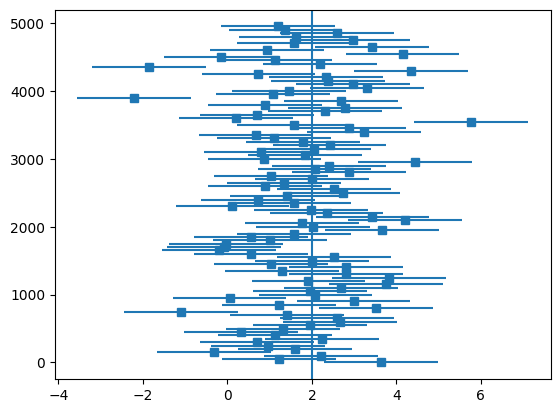

In [127]:
import matplotlib.pyplot as plt
y = range(len(means))
errors_ = [[-(error[0]-mean), error[1]-mean] for error, mean in zip(errors, means)]
plt.errorbar(means, np.array(y)*50, xerr=np.array(errors_).T, marker='s', ls="")
plt.axvline(2)

In [130]:
mu_within_ci = []
for error in errors:
    mu_within_ci.append(error[0]<2<error[1])


In [131]:
np.array(mu_within_ci).sum()/len(mu_within_ci)

0.74

In [133]:
pass_confidence_test==mu_within_ci

True

# Task 3

In [203]:
# when using np.var or np.std, you can pass ddof to take the n-1 denominator factor into account
means = []
variances = []
for i in range(100000):
    means.append(np.random.normal(loc=2, scale=3, size=10).mean())
    variances.append(np.random.normal(loc=3, scale=2, size=10).var(ddof=1))

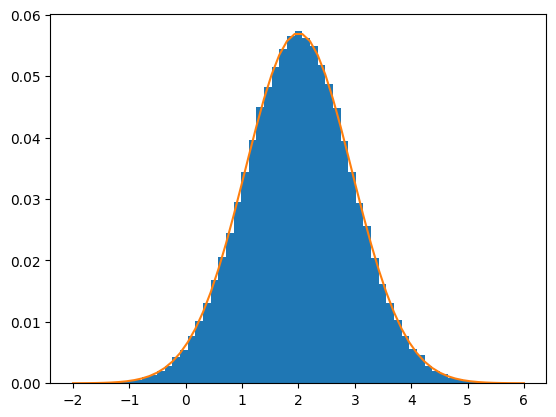

In [204]:
hist, edges = np.histogram(means, np.linspace(-2, 6, 60))
plt.stairs(hist/hist.sum(), edges, fill=True)
x = np.linspace(-2, 6, 60)
y = gaussian(x, 2, 3/np.sqrt(10))
plt.plot(x, y/y.sum())

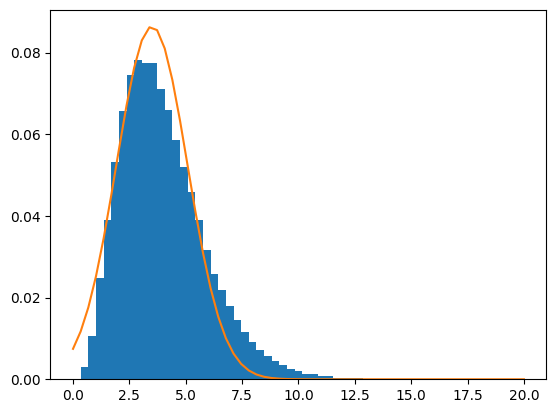

In [205]:
hist, edges = np.histogram(variances, np.linspace(0, 20, 60))
plt.stairs(hist/hist.sum(), edges, fill=True)
x = np.linspace(0, 20, 60)
y=gaussian(x, 3.5, 5/np.sqrt(10))
plt.plot(x, y/y.sum())

In [206]:
from scipy.special import gamma
def chi2(x, n):
    return (1/2)**(n/2)*1/(gamma(n/2))*np.exp(-x/2)*x**(n/2-1)

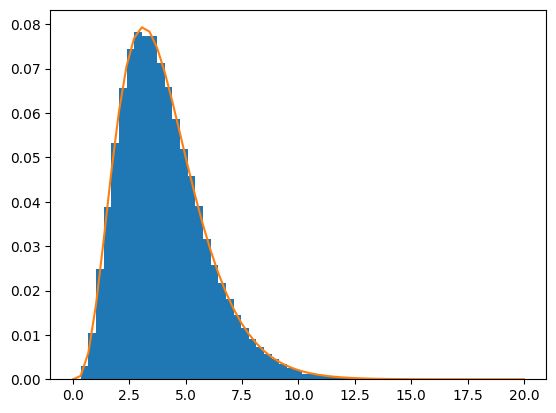

In [213]:
hist, edges = np.histogram(variances, np.linspace(0, 20, 60))
plt.stairs(hist/hist.sum(), edges, fill=True)
x = np.linspace(0, 20, 60)
y=chi2(x*9/np.array(variances).mean(), 9)
plt.plot(x, y/y.sum())